# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Hannah Choi | A16785648 | hachoi@ucsd.edu
- Manav Dixit | A16640571 | mudixit@ucsd.edu
- Anirvinna Jain | A16969723 | anj006@ucsd.edu
- Jake Villasenor | A16845745 | jrvillasenor@ucsd.edu
- Congyuan Yu | A17025468 | coy001@ucsd.edu

# Abstract

The game of Pokémon offers a widespread amount of characteristics for each pokemon, one of which is their type—a fundamental aspect that influences battle outcomes and strategy. This project explores the relationship between Pokémon types and their sprite colors, aiming to determine if a Pokémon's type can be accurately predicted based on the color characteristics of its sprites. Utilizing a predictive model, we analyzed the dominant colors in Pokémon sprites to ascertain their type, focusing primarily on their first type. Our findings reveal a significant correlation between a Pokémon's primary type and its sprite colors, with the model demonstrating perfect accuracy in predicting the primary type based on basic color analysis. However, the accuracy diminishes when applying the model to more nuanced color extractions, highlighting a challenge in identifying secondary types. Even with this limitation, our research offers valuable insights for enhancing gameplay experiences for Pokémon trainers, providing an additional layer of strategy and potentially improving accessibility for players with visual impairments. The implications of our work underscore the potential of leveraging visual data in gaming to enrich player interaction and inclusivity.

# Research Question

Is there a correlation between the type of a pokemon and the colors of their sprite? Can we design a predictive model that accurately predicts a pokemon’s type(s) using only the color of their sprites?

## Background and Prior Work

Pokémon is a popular video game series where players capture, train, and battle creatures and aim to become Pokémon Masters by collecting a diverse array of species and strategically using them in battles against other trainers. Pokémon are categorized into 18 different types (Normal, Fire, Water, Electric, Grass, Ice, Fighting, Poison, Ground, Flying, Psychic, Bug, Rock, Ghost, Dragon, Dark, Steel, and Fairy) based on their elemental attributes and characteristics. Each type has its strengths and weaknesses against other types, adding depth to battles and strategy in team-building.
Exploring the correlation between a Pokémon's type and the colors of its sprite involves analyzing visual patterns and characteristics to predict its elemental category. This inquiry is grounded in the hypothesis that certain color schemes are consistently associated with specific Pokémon types, such as blues with Water-type or reds with Fire-type Pokémon. By leveraging machine learning techniques, it's possible to design a predictive model that uses these color patterns to accurately determine a Pokémon's type, demonstrating the intersection of visual data analysis and predictive modeling in the context of popular culture and gaming.

The project "pokemon-type-prediction" <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) on GitHub by kn-kn is an exemplary study that employs supervised machine learning techniques—Naive Bayes, Support Vector Machines, and Random Forest—to predict Pokémon types based on the colors of their sprites. Utilizing comprehensive datasets from Kaggle and the Veekun Pokedex, the project applies advanced validation methods such as K-folds Cross Validation and GridSearchCV for optimizing model parameters. This approach not only demonstrates the potential of machine learning in gaming and entertainment contexts but also provides a robust framework for our project on exploring the correlation between Pokémon types and sprite colors. By examining the methodologies and results presented in this project, we can gain insights into designing a predictive model tailored to our research question. The key differences in our project and this one are two fold: The first one being that our project is an image classification project, and the other being that this project doesn't take the generation into account as well. 


The kaggle dataset "Pokemon Image Dataset" <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)  includes several projects that intend to study based on pokemon images. The first project, "Pokemon: CNN Image classification" utilized deep learning, specifically CNN, to predict the types of pokemon based on their pictures. Another project "Diffusion: imagine new pokemons" is a generative learning task that uses a U-net based diffusion model and Residual blocks to generate novel pokemons. As the first project is also a classification task, we can certainly adopt their experiences in studying the relationship between pokemons and pokemon types; By contrast, we can hardly technically learn too much from the new pokemon generation projects. Moreover, where the first project might also seem limited is in the fact that it never takes the generation of the pokemons into account. The CNN project also only predicts the primary type of the Pokemon, whereas our goal is to predict both of its types. Our goal, as seen from the secondary hypothesis where we see how the correlation between the sprite color and type has change, is to somehow use that information to add to the model to predict the Pokémon type.


Group 21’s Final Project from Spring 2020 (COGS 108) <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3)  centered around determining the best predictor for Pokémon types, understanding the influence of types on Pokémon attributes, and assessing the feasibility of predicting types based on attributes alone. They utilized a dataset that included comprehensive information on Pokémon attributes such as types, height, weight, and various stats to train a predictive model for Pokémon types. This project is relevant to our project as it provides insights into the complexities of Pokémon attributes and their relationship with types, which aligns with our aim to investigate the correlation between Pokémon types and the colors of their sprites. Their data set source could also serve as a reference or potential resource for acquiring Pokémon data for our predictive model. While their focus was on attribute-based prediction, our project explores a novel angle by examining the relationship between visual cues (sprite colors), offering a unique perspective on Pokémon design. In addition, their project does not offer any analysis of comparisons between generations.

1. <a name="cite_note-1"></a> <sup>[1](https://github.com/kn-kn/pokemon-type-prediction)</sup> Pokemon Type Prediction GitHub Repository: [Link](https://github.com/kn-kn/pokemon-type-prediction)

2. <a name="cite_note-2"></a> <sup>[2](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types)</sup> Pokemon Images and Types Kaggle Dataset: [Link](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types)

3. <a name="cite_note-3"></a> <sup>[3](https://github.com/COGS108/FinalProjects-Sp20/blob/master/FinalProject_group21.ipynb)</sup> COGS108 Final Project - Group 21 Notebook: [Link](https://github.com/COGS108/FinalProjects-Sp20/blob/master/FinalProject_group21.ipynb)



# Hypothesis


We believe that there is a correlation between the type of Pokémon and the colors of their sprite. While it's commonly assumed that Pokémon types are consistently associated with specific colors, we hypothesize that design trends may have evolved over time, leading to potential shifts in this correlation. Our secondary hypothesis suggests that advancements in game technology and design techniques may have influenced how Pokémon types are visually represented in their sprites, potentially leading to a stronger or weaker correlation between type and color in newer generations. For our model, we predict that it will be able to accurately identify the primary typing of most Pokémon, but it will struggle to predict the secondary typing if it is applicable.

# Data

In [24]:
#imports
import os
import pandas as pd
import numpy as np
from IPython.core.display import HTML
from PIL import Image
import requests
from io import BytesIO
from sklearn.cluster import KMeans
import urllib
from urllib.request import urlopen
import cv2
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from webcolors import CSS3_HEX_TO_NAMES, hex_to_rgb
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## Data overview


## Dataset #1: Pokedex_Ver_SV2.csv

- Dataset name: Pokedex_Ver_SV2.csv
- Link to dataset: https://www.kaggle.com/datasets/takamasakato/pokemon-all-status-data/data 
- Number of observations: 6
- Number of variables: 38

In [25]:
poke_info = pd.read_csv('Pokedex_Ver_SV2.csv')

This dataset comes from [Kaggle](https://www.kaggle.com/datasets/takamasakato/pokemon-all-status-data/data) and contains a comprehensive collection of information (name, types, abilities, stats, etc.) of each Pokemon from generations 1-9. We are using this dataset to gather relevant data to populate our own dataset below. From this dataset, we took:
- Pokedex number
- Branch code (keeps track of pokemon forms)
- Pokemon name
- Generation (1-9)
- Type 1
- Type 2 (if applicable)


The variables taken from this dataset will be further cleaned in dataset 2, which we created ourselves and converted to a CSV file.

## Dataset #2: pokemon.csv

- Dataset name: pokemon.csv
- Link to dataset: N/A
- Number of observations: 8
- Number of variables: 8

In [26]:
# This is the orginal dataset that we found
df = pd.read_csv('pokemon.csv')

In [27]:
# In order to make preprocessing and datacleaning faster, we exported our dataset to a csv after we initially
# cleaned the dataset for our analysis
#df = pd.read_csv('pokemon_final.csv')

This dataset was created using data from the Pokedex_Ver_SV2.csv file. We cleaned this data in several ways for the following purposes:
- **Altered Pokemon names**: We altered the names in the original dataset to match the names in the image URLs that would later be generated in the dataset.

- **Removed mega evolutions**: We removed all mega evolutions from the dataset to reduce complexity in the predictive models we will soon be creating.

- **Number of types**: We counted the number of types each pokemon has (either 1 or 2). This will be used later to inform our predictive model of how many types a Pokemon has for type prediction purposes.

- **Sprite URLs**: We found that from the Pokemon Database's [Pokemon Sprite Archive](https://pokemondb.net/sprites), all of the sprites had the same URL path with the exception of each Pokemon's name. With this information, we generated URLs to the png image for each Pokemon in the dataset. We used requests to determine which links were invalid to inform our data cleaning process. These URLs will be used in our image processing section, where we will determine the dominant colors of a Pokemon's sprite.

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA: Determine dominant colors in sprites

In this section, we will be determining the most dominant color (in RGB format) of a given sprite. We do this by first loading the image collected from the png URLs we generated previously. Then, we convery the image to a numpy array, which will allow us to manipulate the image data easier. Since images have backgrounds and sprite outlines, white and black would be the dominant color for most pokemon. To address this issue, we apply a mask to filter out colors too close to black or white. Images that are predominantly white or black will be empty, which is accounted for in our code. 

To find the most dominant color in a Pokemon's sprite, we apply **k-means clustering** to identify clusters of similar colors. The cluster with the highest frequency is the sprites, dominant color. The RGB value of the centroid of this cluster is extracted, giving us the dominant color of the sprite.

In [28]:
'''
The code of this function is completely generated by ChatGPT from the prompt write me a function that given
the url of the image can return the most dominant pixel within the color, but also ensure that the dominant color
will not be white or black in the background through a buffer between all white and all black RGB values
'''
# obtain the dominant color of sprite through image processing
def extract_dominant_color(image_url, num_clusters=5, exclude_threshold=20):
    # Load the image
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    image = image.convert('RGB')

    # Convert image to numpy array
    np_image = np.array(image)
    original_shape = np_image.shape
    np_image = np_image.reshape((-1, 3))
    
    # Filter out colors too close to black or white
    # Define black and white threshold (0 + exclude_threshold, 255 - exclude_threshold)
    mask = ~((np_image.max(axis=1) > (255 - exclude_threshold)) | (np_image.min(axis=1) < exclude_threshold))
    filtered_image = np_image[mask]

    # Check if filtered_image is empty (e.g., image is predominantly black/white)
    if filtered_image.size == 0:
        return np.array([0, 0, 0])  # Return black (or another placeholder) if filtering excludes all pixels

    # Apply k-means clustering to find the most dominant color
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(filtered_image)
    
    # Get the RGB values of the dominant color
    # Select the cluster with the highest frequency
    unique, counts = np.unique(kmeans.labels_, return_counts=True)
    dominant_cluster = unique[counts.argmax()]
    dominant_color = kmeans.cluster_centers_[dominant_cluster].astype(int)
    
    return dominant_color

In the following cell, we created a dictionary of the Pokemon types and their corresponding RGB values. For this encoding, we are using the following [image](https://static.wikia.nocookie.net/robloxpokemonbrickbronze/images/5/5f/Type.png/revision/latest?cb=20170426085006) as reference:


![Pokemon types](https://static.wikia.nocookie.net/robloxpokemonbrickbronze/images/5/5f/Type.png/revision/latest?cb=20170426085006)


For each Pokemon, we will assign the type color according to their primary typing. For example, Bulbasaur is a grass/poison type, but it will only be assigned the grass RGB value of [0, 100, 0]. We do this by applying a function ```add_rep_pixel_val``` to a basic_color column of our dataset.

Also included in this cell is a dictionary of Pokemon types and their corresponding hex codes. This will be used later for color mapping.



In [29]:
'''
The following code is partly generated by Chat GPT using the prompt
"Convert the rgb values in this dictionary into another dictionary with their respective hex value"
'''

type_colors = {
    'bug': [204, 204, 0],
    'dark': [31, 16, 8],
    'dragon': [167, 143, 206],
    'electric': [255, 255, 0],
    'fairy': [255, 182, 193],
    'fighting': [136, 84, 11],
    'fire': [255, 0, 0],
    'flying': [65, 105, 225],
    'ghost': [25, 25, 112],
    'grass': [0, 100, 0],
    'ground': [204, 164, 0],
    'ice': [135, 206, 235],
    'normal': [211, 211, 211],
    'poison': [97, 64, 81],
    'psychic': [255, 105, 180],
    'rock': [128, 109, 0],
    'steel': [170, 170, 170],
    'water': [4, 124, 201]
}

type_colors_rgb = {
    'bug': '#cccc00',
    'dark': '#1f1008',
    'dragon': '#a78fce',
    'electric': '#ffff00',
    'fairy': '#ffb6c1',
    'fighting': '#88540b',
    'fire': '#ff0000',
    'flying': '#4169e1',
    'ghost': '#191970',
    'grass': '#006400',
    'ground': '#cca400',
    'ice': '#87ceeb',
    'normal': '#d3d3d3',
    'poison': '#614051',
    'psychic': '#ff69b4',
    'rock': '#806d00',
    'steel': '#aaaaaa',
    'water': '#047cc9'
}

def add_rep_pixel_val(type):
     return type_colors[type]

df['basic_color'] = df['type1'].apply(add_rep_pixel_val)

Now that we have our ```extract_dominant_color``` function defined and functioning, we can apply it to our entire dataset in a new column called **sprite dominant color**.

The code below is what we used to populate the **sprite dominant color** column of the dataset. We commented it out after saving the resulting dataset to a csv called **pokemon-final.csv** for runtime purposes.

In [30]:
df['sprite dominant color'] = df['sprites'].apply(extract_dominant_color)

In [31]:
#df.to_csv('pokemon-final.csv', index=False)

For the purposes of exploring trends in our data, we will split our dataset by generation. This will help to address our secondary hypothesis, which is that design trends over the years have influenced the correlation between Pokemon typing and the dominant colors of Pokemon sprites.

In [32]:
#split dataset by generation 1 through 9
gen1 = df[df['generation'] == 1]
gen2 = df[df['generation'] == 2]
gen3 = df[df['generation'] == 3]
gen4 = df[df['generation'] == 4]
gen5 = df[df['generation'] == 5]
gen6 = df[df['generation'] == 6]
gen7 = df[df['generation'] == 7]
gen8 = df[df['generation'] == 8]
gen9 = df[df['generation'] == 9]

In [33]:
#ignore warnings
warnings.filterwarnings("ignore", category=pd.core.generic.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


The following cell contains our initial data cleaning and processing of the dataframe. It has been commented out because we now use the filtered out csv file with this function already applied.

In [34]:
# gen1['sprite dominant color'] = gen1['sprites'].apply(extract_dominant_color)
# gen2['sprite dominant color'] = gen2['sprites'].apply(extract_dominant_color)
# gen3['sprite dominant color'] = gen3['sprites'].apply(extract_dominant_color)
# gen4['sprite dominant color'] = gen4['sprites'].apply(extract_dominant_color)
# gen5['sprite dominant color'] = gen5['sprites'].apply(extract_dominant_color)
# gen6['sprite dominant color'] = gen6['sprites'].apply(extract_dominant_color)
# gen7['sprite dominant color'] = gen7['sprites'].apply(extract_dominant_color)
# gen8['sprite dominant color'] = gen8['sprites'].apply(extract_dominant_color)
# gen9['sprite dominant color'] = gen9['sprites'].apply(extract_dominant_color)

In [35]:
#df = pd.read_csv('pokemon-final.csv')

def extract_red(rgb):
    return rgb[0]

def extract_green(rgb):
    return rgb[1]


def extract_blue(rgb):
    return rgb[2]

df['red'] = df['sprite dominant color'].apply(extract_red)
df['green'] = df['sprite dominant color'].apply(extract_green)
df['blue'] = df['sprite dominant color'].apply(extract_blue)

df

,pokedex number,branch code,name,generation,type1,type2,number of types,sprites,basic_color,sprite dominant color,red,green,blue
0,1,1_0,bulbasaur,1,grass,poison,2,https://img.pokemondb.net/sprites/home/normal/...,"[0, 100, 0]","[135, 202, 191]",135,202,191
1,2,2_0,ivysaur,1,grass,poison,2,https://img.pokemondb.net/sprites/home/normal/...,"[0, 100, 0]","[93, 175, 189]",93,175,189
2,3,3_0,venusaur,1,grass,poison,2,https://img.pokemondb.net/sprites/home/normal/...,"[0, 100, 0]","[86, 169, 61]",86,169,61
3,4,4_0,charmander,1,fire,NaN,1,https://img.pokemondb.net/sprites/home/normal/...,"[255, 0, 0]","[215, 153, 90]",215,153,90
4,5,5_0,charmeleon,1,fire,NaN,1,https://img.pokemondb.net/sprites/home/normal/...,"[255, 0, 0]","[198, 102, 91]",198,102,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,1006,1006_0,iron-valiant,9,fairy,fighting,2,https://img.pokemondb.net/sprites/home/normal/...,"[255, 182, 193]","[202, 203, 196]",202,203,196
1151,1007,1007_0,koraidon,9,fighting,dragon,2,https://img.pokemondb.net/sprites/home/normal/...,"[136, 84, 11]","[215, 210, 209]",215,210,209
1152,1008,1008_0,miraidon,9,electric,dragon,2,https://img.pokemondb.net/sprites/home/normal/...,"[255, 255, 0]","[119, 148, 163]",119,148,163
1153,1009,1009_0,walking-wake,9,water,dragon,2,https://img.pokemondb.net/sprites/home/normal/...,"[4, 124, 201]","[203, 207, 209]",203,207,209


In [36]:
le = LabelEncoder()
le.fit(df['type1'])
df['encoded_type1'] = le.transform(df['type1'])
df

,pokedex number,branch code,name,generation,type1,type2,number of types,sprites,basic_color,sprite dominant color,red,green,blue,encoded_type1
0,1,1_0,bulbasaur,1,grass,poison,2,https://img.pokemondb.net/sprites/home/normal/...,"[0, 100, 0]","[135, 202, 191]",135,202,191,9
1,2,2_0,ivysaur,1,grass,poison,2,https://img.pokemondb.net/sprites/home/normal/...,"[0, 100, 0]","[93, 175, 189]",93,175,189,9
2,3,3_0,venusaur,1,grass,poison,2,https://img.pokemondb.net/sprites/home/normal/...,"[0, 100, 0]","[86, 169, 61]",86,169,61,9
3,4,4_0,charmander,1,fire,NaN,1,https://img.pokemondb.net/sprites/home/normal/...,"[255, 0, 0]","[215, 153, 90]",215,153,90,6
4,5,5_0,charmeleon,1,fire,NaN,1,https://img.pokemondb.net/sprites/home/normal/...,"[255, 0, 0]","[198, 102, 91]",198,102,91,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,1006,1006_0,iron-valiant,9,fairy,fighting,2,https://img.pokemondb.net/sprites/home/normal/...,"[255, 182, 193]","[202, 203, 196]",202,203,196,4
1151,1007,1007_0,koraidon,9,fighting,dragon,2,https://img.pokemondb.net/sprites/home/normal/...,"[136, 84, 11]","[215, 210, 209]",215,210,209,5
1152,1008,1008_0,miraidon,9,electric,dragon,2,https://img.pokemondb.net/sprites/home/normal/...,"[255, 255, 0]","[119, 148, 163]",119,148,163,3
1153,1009,1009_0,walking-wake,9,water,dragon,2,https://img.pokemondb.net/sprites/home/normal/...,"[4, 124, 201]","[203, 207, 209]",203,207,209,17


### Section 2 of EDA: Find correlation between sprite colors and typing

In this section, we will conduct some exploratory data analysis and showcase our findings and their relevance.

In the cell below, we created a bar plot to represent the distribution of Pokemon with only one type in each generation. Since we are only predicting the primary typing of each Pokemon based on the dominant color in their sprite, we can make an assumption that a generation with a higher number of single-type Pokemon will produce a higher accuracy in our model, and vice versa for multi-type Pokemon.

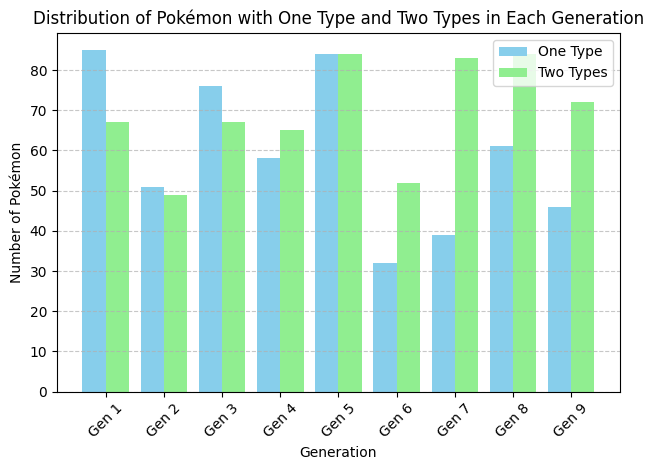

In [37]:
'''
The following code has been mostly generated by Chat GPT.
I was able to get all the data that I wanted to plot, and fed it the lines of code I had written
and asked it to create a barplot for the distribution and then asked it to add labels and a title and make 
it look nicer
'''

one_type_pokemon = df[df['number of types'] == 1]
two_type_pokemon = df[df['number of types'] == 2]

# count occurrences of pokemon with one type in each generation
one_type_counts = one_type_pokemon['generation'].value_counts().sort_index()

# count occurrences of pokemon with two types in each generation
two_type_counts = two_type_pokemon['generation'].value_counts().sort_index()


# bar plot for the distribution of pokemon with one type in each generation
generation_labels = ['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6', 'Gen 7', 'Gen 8', 'Gen 9']

plt.bar(np.arange(len(generation_labels)) - 0.2, one_type_counts, width=0.4, color='skyblue', label='One Type')
plt.bar(np.arange(len(generation_labels)) + 0.2, two_type_counts, width=0.4, color='lightgreen', label='Two Types')

plt.title('Distribution of Pokémon with One Type and Two Types in Each Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Pokémon')
plt.xticks(np.arange(len(generation_labels)), generation_labels, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In the next cell, we are converting CSS3 hex colors to RGB values. The purpose of this code is to change the hex codes to names. Once we have names, we can build a KDTree to allow for fast lookup of the closest color name based on a given RGB value. We will use the results of this KDTree to generalize the color of the typings in our charts and graphs.

In [38]:
'''
The code of this function is completely generated by ChatGPT from the prompt "write me a function that 
can find the closest basic color value to the rgb value that I have"
'''

# Convert the CSS3 hex colors to RGB
css3_db = CSS3_HEX_TO_NAMES
names = []
rgb_values = []
for color_hex, color_name in css3_db.items():
    names.append(color_name)
    rgb_values.append(hex_to_rgb(color_hex))

# Build a KDTree for fast lookup of closest color names
kdt_db = KDTree(rgb_values)

def convert_rgb_to_names(rgb):
    distance, index = kdt_db.query(rgb)
    return names[index]

In the code below we are making a copy of our dataset, called ```df2```, to convert each RGB value to the closest CSS3 color name without editing our original dataframe. This is where the dictionary of types and their hex values (**type_colors_rgb**) in Section 1 is used. 

Using this information, we generated a countplot to see the distribution of Pokemon by primary types for all generations.

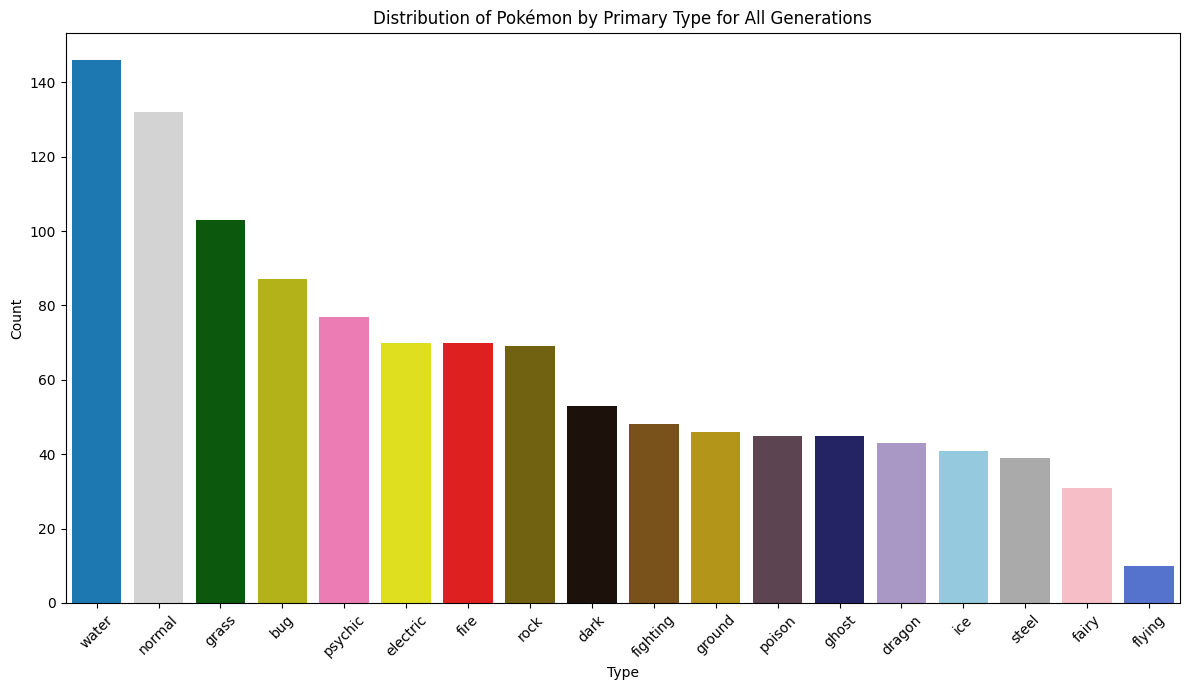

In [39]:
'''
The following code has been fully generated by chatGPT
with the prompt "using my dataframe, help me generate a plot that shows the color distribution
of the pokemon by their types"
'''
df2 = df.copy()
# Assuming 'sprite dominant color' is stored as a list of RGB values
# Convert each RGB value to the closest CSS3 color name
df2['color_name'] = df2['sprite dominant color'].apply(lambda x: convert_rgb_to_names(tuple(x)))

# Quick check on the conversion
df_eda = df2[['type1', 'sprite dominant color', 'color_name']]
# Creating a custom color palette for Pokémon types
pokemon_type_order = df_eda['type1'].value_counts().index
custom_palette = [type_colors_rgb[type_] for type_ in pokemon_type_order]

# Plotting distribution of Pokémon by their primary type with custom colors
plt.figure(figsize=(12, 7))
sns.countplot(data=df_eda, x='type1', palette=custom_palette, order=pokemon_type_order)
plt.title('Distribution of Pokémon by Primary Type for All Generations')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Based on the countplot we generated, we can observe that the most common primary type is water, while the least common primary type is flying. The uneven distribution of data may cause lower accuracy in our predictive model for types on the left side of the plot.

To understand the distribution of primary types, we decided to split up the chart by generation. Doing this will allow us to see which typings have less data in each generation, which may inform the accuracy results by generation of our predictive model.

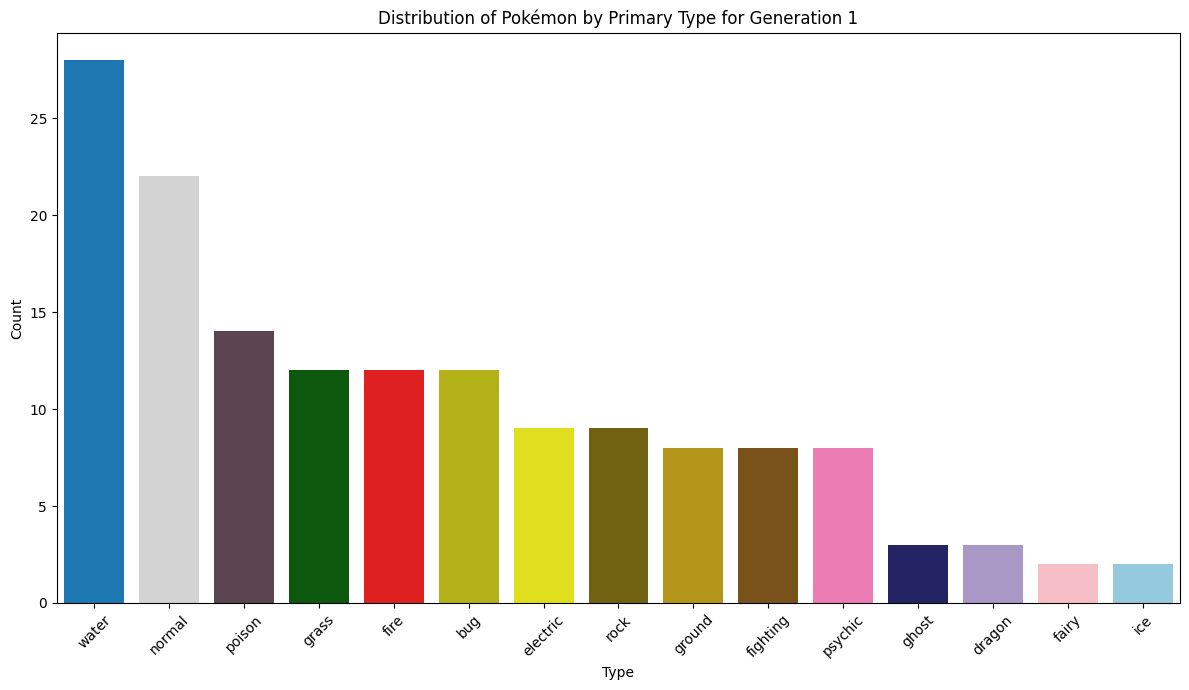

In [40]:
'''
The following code has been generated by Chat GPT. 
I used the code from the previous graph, and modified it to accomodate only generation 1 pokemon.
'''

# Assuming 'sprite dominant color' is stored as a list of RGB values
# Convert each RGB value to the closest CSS3 color name
gen1['color_name'] = gen1['sprite dominant color'].apply(lambda x: convert_rgb_to_names(tuple(x)))

# Quick check on the conversion
gen1_eda = gen1[['type1', 'sprite dominant color', 'color_name']]
# Creating a custom color palette for Pokémon types
pokemon_type_order = gen1_eda['type1'].value_counts().index
custom_palette = [type_colors_rgb[type_] for type_ in pokemon_type_order]

# Plotting distribution of Pokémon by their primary type with custom colors
plt.figure(figsize=(12, 7))
sns.countplot(data=gen1_eda, x='type1', palette=custom_palette, order=pokemon_type_order)
plt.title('Distribution of Pokémon by Primary Type for Generation 1')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

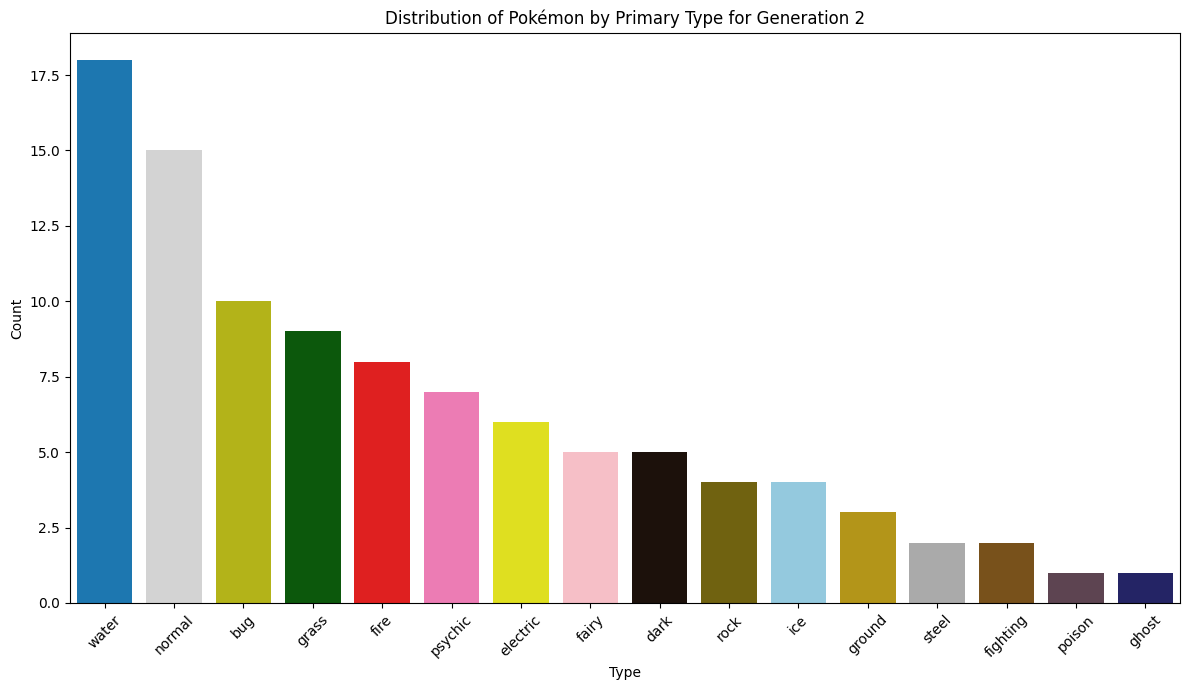

In [41]:
'''
The following code has been generated by Chat GPT. 
I used the code from the previous graph, and modified it to accomodate only generation 2 pokemon.
'''

# Assuming 'sprite dominant color' is stored as a list of RGB values
# Convert each RGB value to the closest CSS3 color name
gen2['color_name'] = gen2['sprite dominant color'].apply(lambda x: convert_rgb_to_names(tuple(x)))

# Quick check on the conversion
gen2_eda = gen2[['type1', 'sprite dominant color', 'color_name']]
# Creating a custom color palette for Pokémon types
pokemon_type_order = gen2_eda['type1'].value_counts().index
custom_palette = [type_colors_rgb[type_] for type_ in pokemon_type_order]

# Plotting distribution of Pokémon by their primary type with custom colors
plt.figure(figsize=(12, 7))
sns.countplot(data=gen2_eda, x='type1', palette=custom_palette, order=pokemon_type_order)
plt.title('Distribution of Pokémon by Primary Type for Generation 2')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

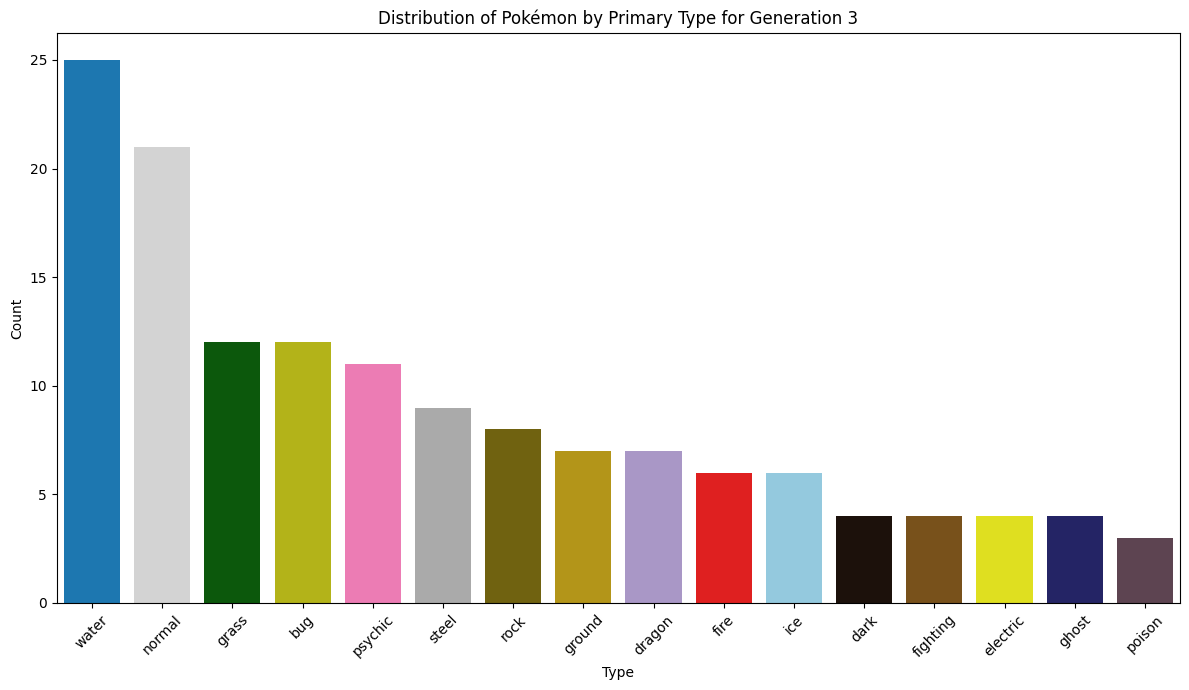

In [42]:
'''
The following code has been generated by Chat GPT. 
I used the code from the previous graph, and modified it to accomodate only generation 3 pokemon.
'''

# Assuming 'sprite dominant color' is stored as a list of RGB values
# Convert each RGB value to the closest CSS3 color name
gen3['color_name'] = gen3['sprite dominant color'].apply(lambda x: convert_rgb_to_names(tuple(x)))

# Quick check on the conversion
gen3_eda = gen3[['type1', 'sprite dominant color', 'color_name']]
# Creating a custom color palette for Pokémon types
pokemon_type_order = gen3_eda['type1'].value_counts().index
custom_palette = [type_colors_rgb[type_] for type_ in pokemon_type_order]

# Plotting distribution of Pokémon by their primary type with custom colors
plt.figure(figsize=(12, 7))
sns.countplot(data=gen3_eda, x='type1', palette=custom_palette, order=pokemon_type_order)
plt.title('Distribution of Pokémon by Primary Type for Generation 3')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

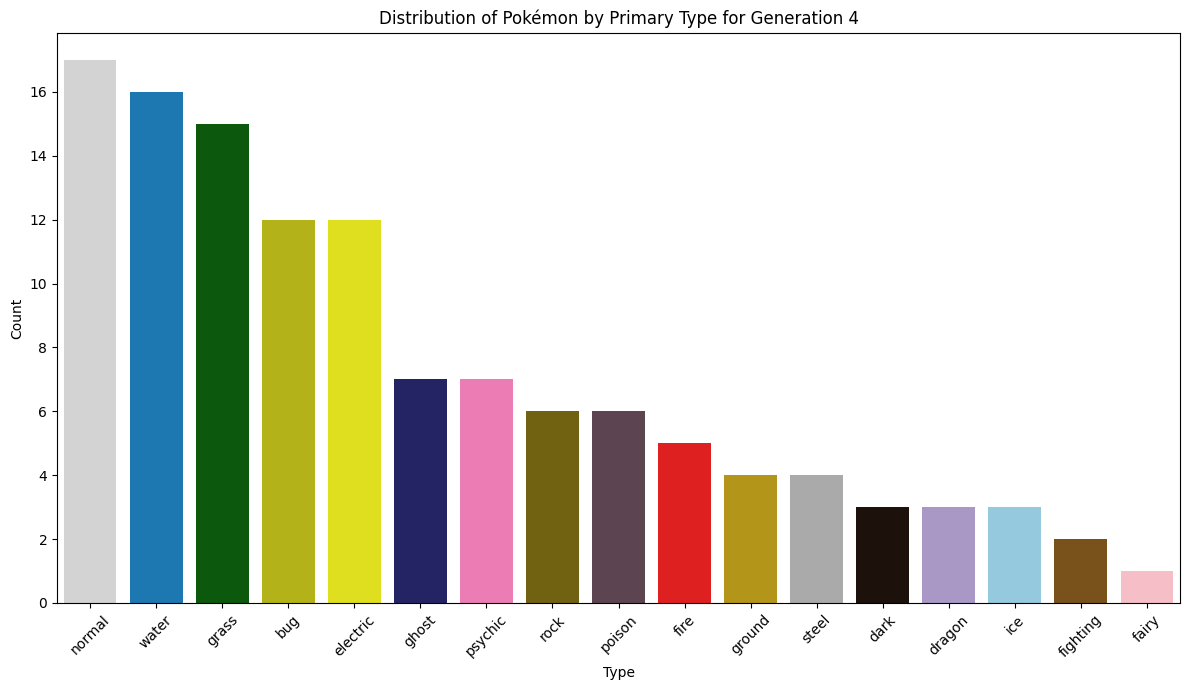

In [43]:
'''
The following code has been generated by Chat GPT. 
I used the code from the previous graph, and modified it to accomodate only generation 4 pokemon.
'''

# Assuming 'sprite dominant color' is stored as a list of RGB values
# Convert each RGB value to the closest CSS3 color name
gen4['color_name'] = gen4['sprite dominant color'].apply(lambda x: convert_rgb_to_names(tuple(x)))

# Quick check on the conversion
gen4_eda = gen4[['type1', 'sprite dominant color', 'color_name']]
# Creating a custom color palette for Pokémon types
pokemon_type_order = gen4_eda['type1'].value_counts().index
custom_palette = [type_colors_rgb[type_] for type_ in pokemon_type_order]

# Plotting distribution of Pokémon by their primary type with custom colors
plt.figure(figsize=(12, 7))
sns.countplot(data=gen4_eda, x='type1', palette=custom_palette, order=pokemon_type_order)
plt.title('Distribution of Pokémon by Primary Type for Generation 4')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

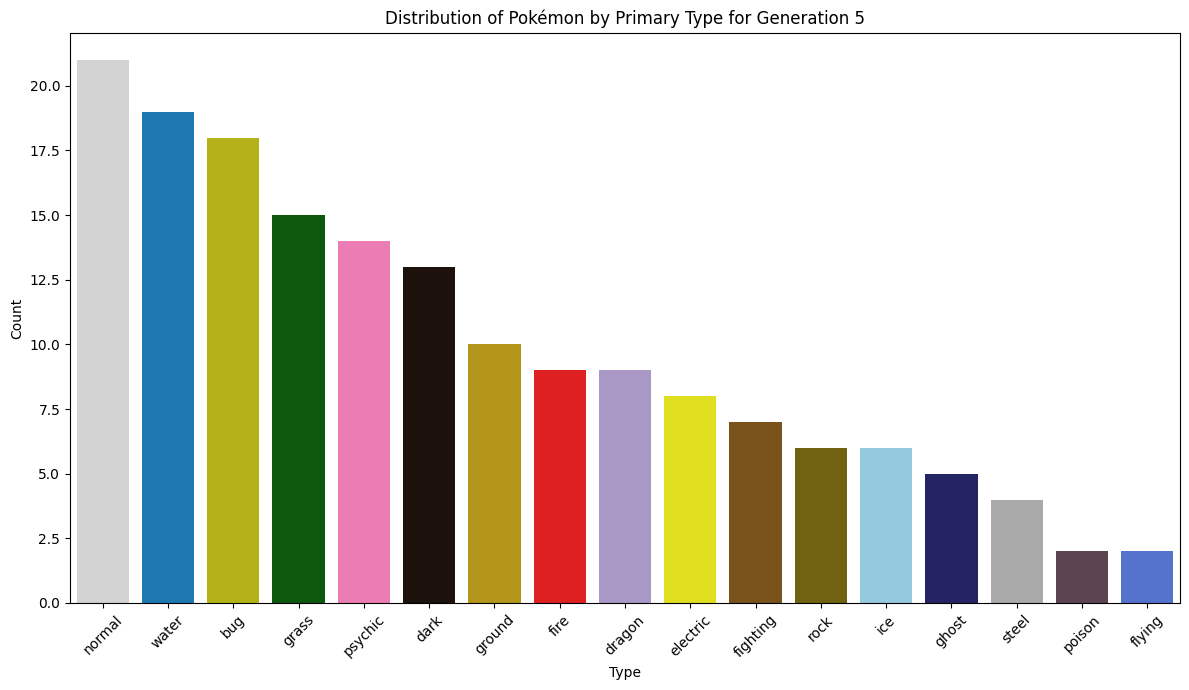

In [44]:
'''
The following code has been generated by Chat GPT. 
I used the code from the previous graph, and modified it to accomodate only generation 5 pokemon.
'''

# Assuming 'sprite dominant color' is stored as a list of RGB values
# Convert each RGB value to the closest CSS3 color name
gen5['color_name'] = gen5['sprite dominant color'].apply(lambda x: convert_rgb_to_names(tuple(x)))

# Quick check on the conversion
gen5_eda = gen5[['type1', 'sprite dominant color', 'color_name']]
# Creating a custom color palette for Pokémon types
pokemon_type_order = gen5_eda['type1'].value_counts().index
custom_palette = [type_colors_rgb[type_] for type_ in pokemon_type_order]

# Plotting distribution of Pokémon by their primary type with custom colors
plt.figure(figsize=(12, 7))
sns.countplot(data=gen5_eda, x='type1', palette=custom_palette, order=pokemon_type_order)
plt.title('Distribution of Pokémon by Primary Type for Generation 5')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

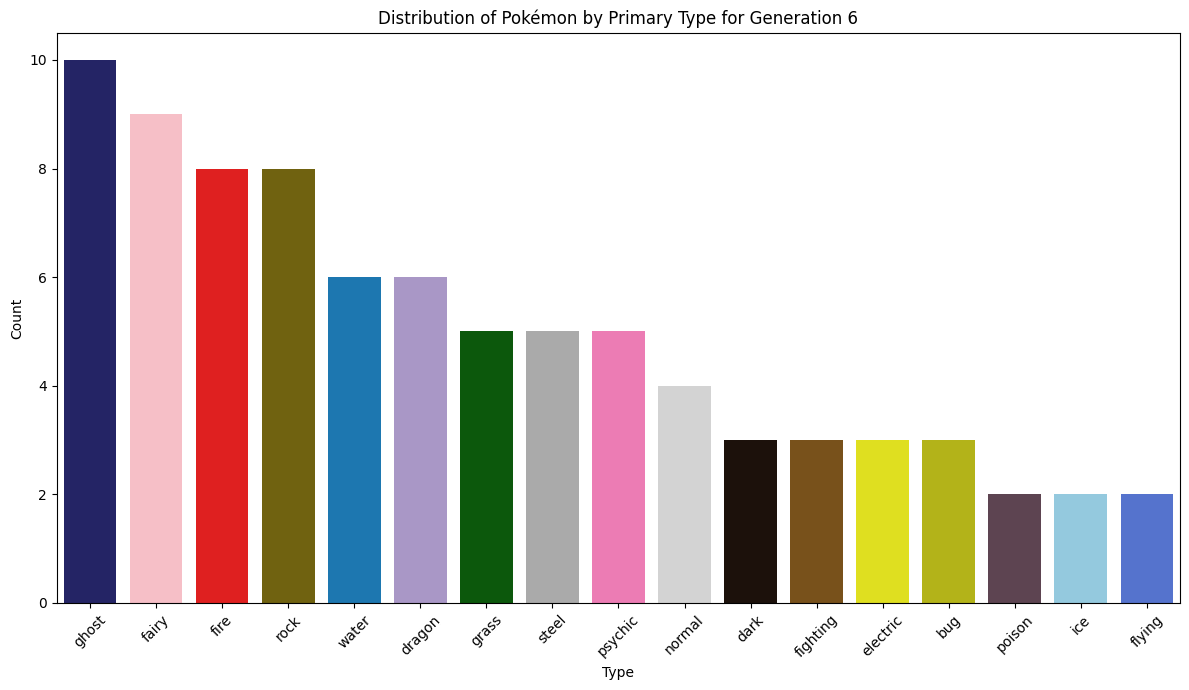

In [45]:
'''
The following code has been generated by Chat GPT. 
I used the code from the previous graph, and modified it to accomodate only generation 6 pokemon.
'''

# Assuming 'sprite dominant color' is stored as a list of RGB values
# Convert each RGB value to the closest CSS3 color name
gen6['color_name'] = gen6['sprite dominant color'].apply(lambda x: convert_rgb_to_names(tuple(x)))

# Quick check on the conversion
gen6_eda = gen6[['type1', 'sprite dominant color', 'color_name']]
# Creating a custom color palette for Pokémon types
pokemon_type_order = gen6_eda['type1'].value_counts().index
custom_palette = [type_colors_rgb[type_] for type_ in pokemon_type_order]

# Plotting distribution of Pokémon by their primary type with custom colors
plt.figure(figsize=(12, 7))
sns.countplot(data=gen6_eda, x='type1', palette=custom_palette, order=pokemon_type_order)
plt.title('Distribution of Pokémon by Primary Type for Generation 6')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

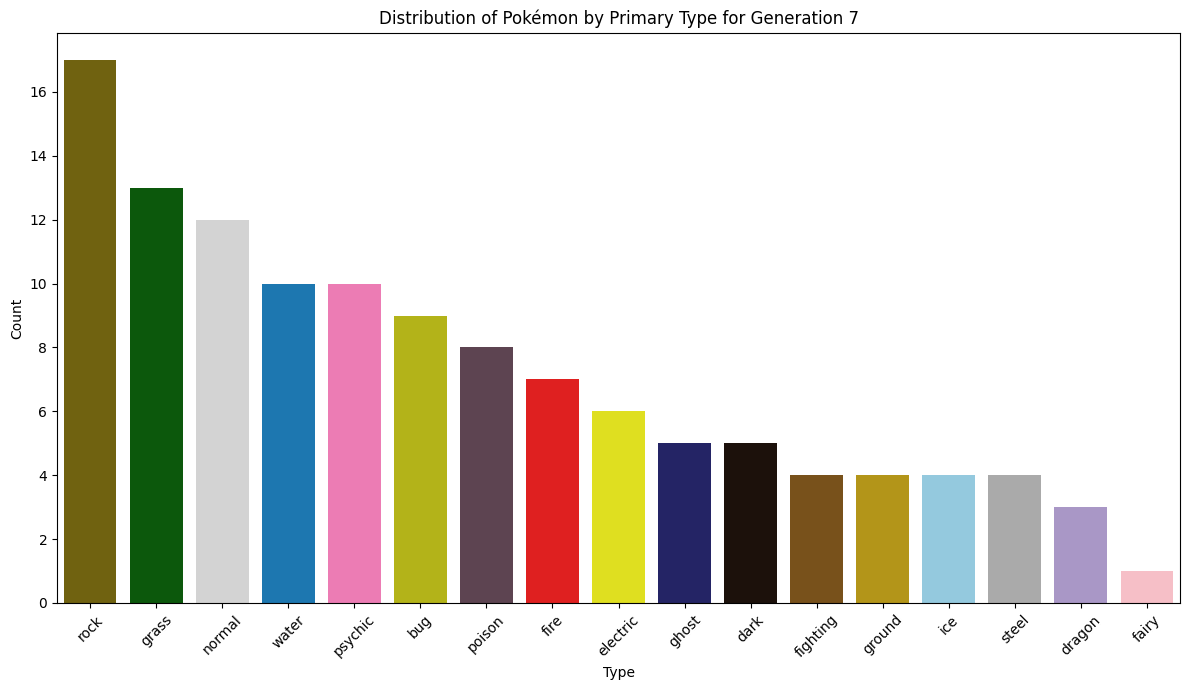

In [46]:
'''
The following code has been generated by Chat GPT. 
I used the code from the previous graph, and modified it to accomodate only generation 7 pokemon.
'''

# Assuming 'sprite dominant color' is stored as a list of RGB values
# Convert each RGB value to the closest CSS3 color name
gen7['color_name'] = gen7['sprite dominant color'].apply(lambda x: convert_rgb_to_names(tuple(x)))

# Quick check on the conversion
gen7_eda = gen7[['type1', 'sprite dominant color', 'color_name']]
# Creating a custom color palette for Pokémon types
pokemon_type_order = gen7_eda['type1'].value_counts().index
custom_palette = [type_colors_rgb[type_] for type_ in pokemon_type_order]

# Plotting distribution of Pokémon by their primary type with custom colors
plt.figure(figsize=(12, 7))
sns.countplot(data=gen7_eda, x='type1', palette=custom_palette, order=pokemon_type_order)
plt.title('Distribution of Pokémon by Primary Type for Generation 7')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

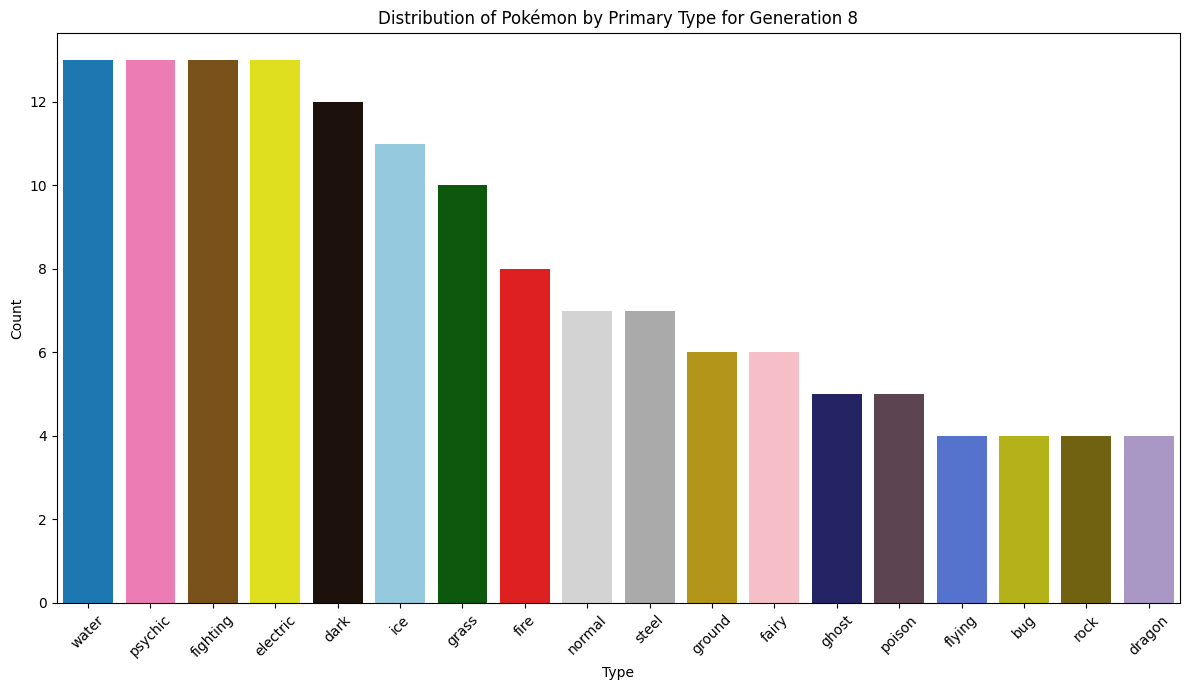

In [47]:
'''
The following code has been generated by Chat GPT. 
I used the code from the previous graph, and modified it to accomodate only generation 8 pokemon.
'''

# Assuming 'sprite dominant color' is stored as a list of RGB values
# Convert each RGB value to the closest CSS3 color name
gen8['color_name'] = gen8['sprite dominant color'].apply(lambda x: convert_rgb_to_names(tuple(x)))

# Quick check on the conversion
gen8_eda = gen8[['type1', 'sprite dominant color', 'color_name']]
# Creating a custom color palette for Pokémon types
pokemon_type_order = gen8_eda['type1'].value_counts().index
custom_palette = [type_colors_rgb[type_] for type_ in pokemon_type_order]

# Plotting distribution of Pokémon by their primary type with custom colors
plt.figure(figsize=(12, 7))
sns.countplot(data=gen8_eda, x='type1', palette=custom_palette, order=pokemon_type_order)
plt.title('Distribution of Pokémon by Primary Type for Generation 8')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

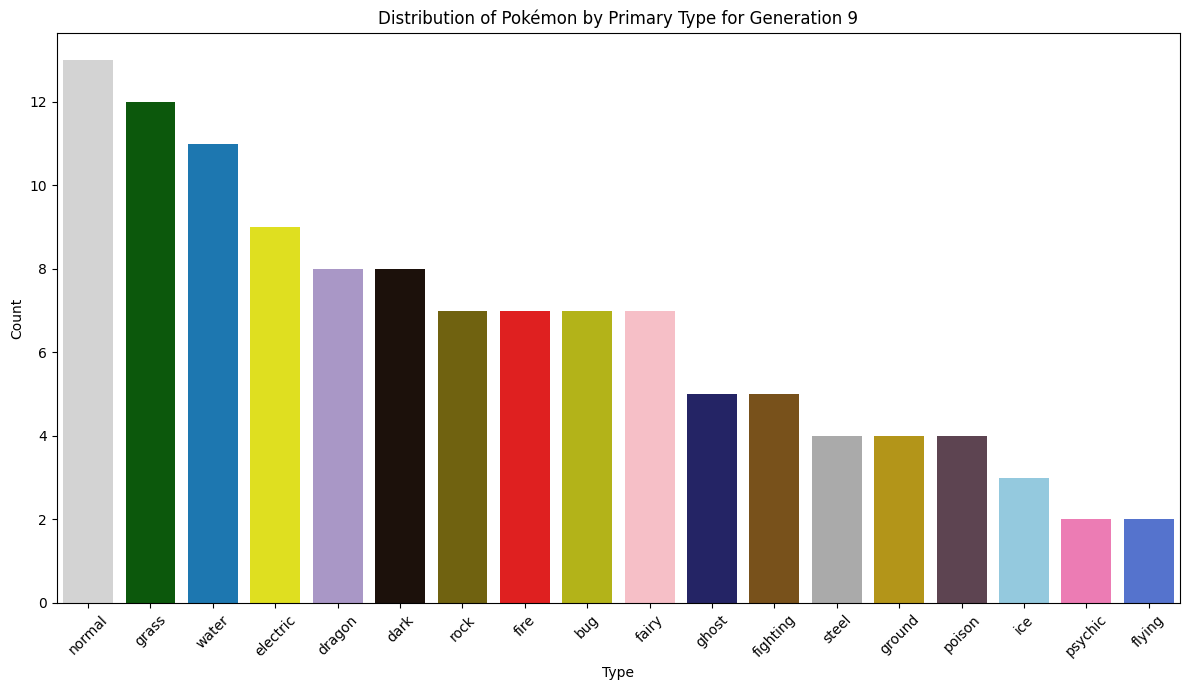

In [48]:
'''
The following code has been generated by Chat GPT. 
I used the code from the previous graph, and modified it to accomodate only generation 9 pokemon.'''

# Assuming 'sprite dominant color' is stored as a list of RGB values
# Convert each RGB value to the closest CSS3 color name
gen9['color_name'] = gen9['sprite dominant color'].apply(lambda x: convert_rgb_to_names(tuple(x)))

# Quick check on the conversion
gen9_eda = gen9[['type1', 'sprite dominant color', 'color_name']]
# Creating a custom color palette for Pokémon types
pokemon_type_order = gen9_eda['type1'].value_counts().index
custom_palette = [type_colors_rgb[type_] for type_ in pokemon_type_order]

# Plotting distribution of Pokémon by their primary type with custom colors
plt.figure(figsize=(12, 7))
sns.countplot(data=gen9_eda, x='type1', palette=custom_palette, order=pokemon_type_order)
plt.title('Distribution of Pokémon by Primary Type for Generation 9')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Section 3 of EDA: Determine change in color-typing correlation throughout generations

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

One way to check out the distribution of each color for each type in each generation was using plots. We created this function that takes in a generation, and a pokemon type. We are then taking the red, green, and blue columns to group them as a 3D dataset, and plot those coordinates in a 3D graph. 
Below we are only implimenting this for 'Grass' type, but we are comparing distributions accross all the nine generations. 

In [49]:
#TODO: Using results from Section 2, see if the correlation becomes stronger, weaker, or stays the same throughout generations 1 through 9.

'''
The following code is partly generated by Chat GPT using the command:
Give me a code to plot a 3D scatterplot using three different columns of a dataframe

It gave us a general approach and it was customized to fit our requirements.
'''

def create_3d_plot(gen, poke_type):
    gen_data = df[(df['generation'] == gen) & (df['type1'] == poke_type)]
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')
    # Plotting the data
    ax.scatter(gen_data['red'], gen_data['green'], gen_data['blue'])

    # Adding labels to the axes
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    
    plt.title(f'{poke_type} in Generation {gen}')
    

    # Display the plot
    plt.show()

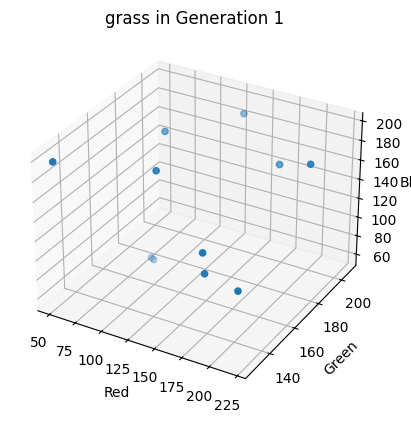

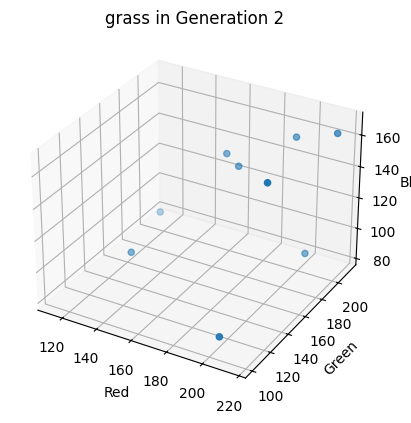

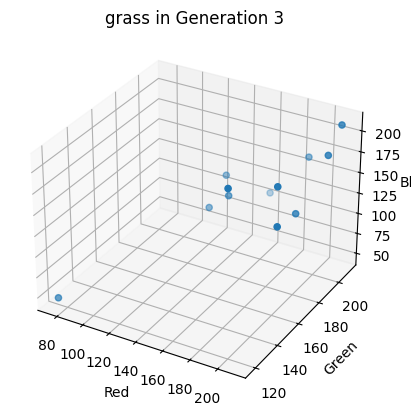

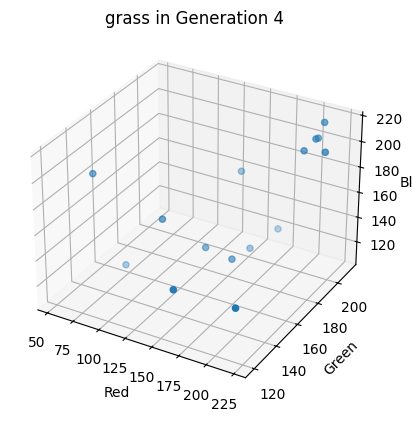

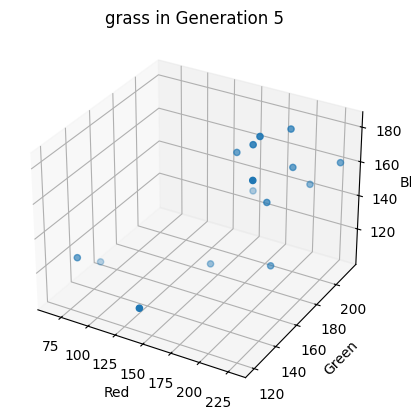

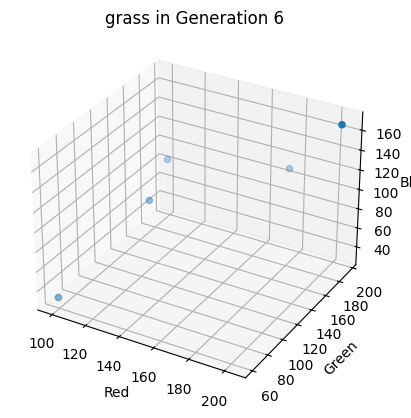

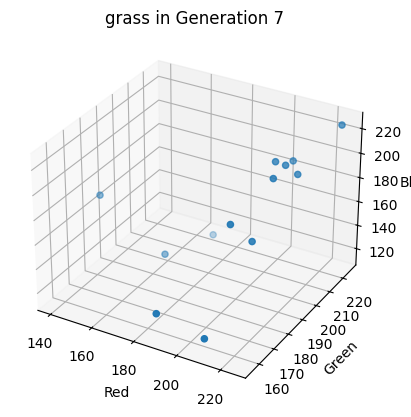

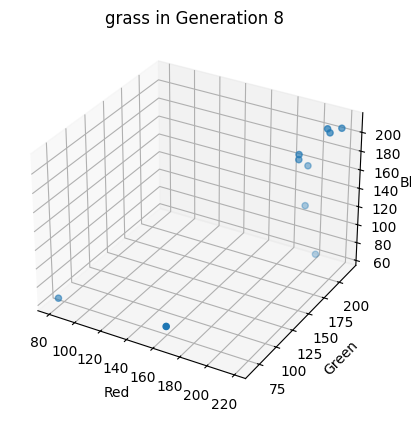

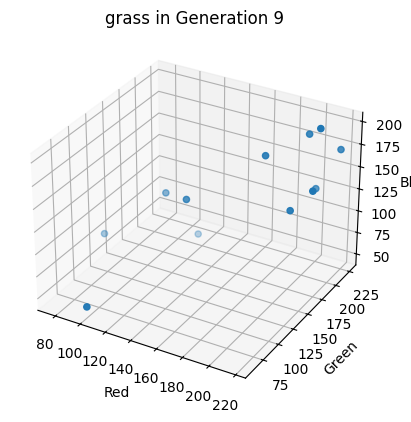

In [50]:
gens = np.arange(1, len(df['generation'].unique()) + 1)

for gen in gens:
    create_3d_plot(gen, 'grass')

As we can see from the plots above, the points in each figure appear scattered across. It is difficult to see a correaltion. Our initial assumption was that these points would form a cluster around a certain point, which would in a way say that all 'Grass' type pokemons are some shade of green. However, judging from these plots that is not the case. Moreoever, the graphs appear different in each generation, showcasing some form of randomness.

### Section 4 of EDA: Predictive model
In this section, our approach is to predict the primary type of pokemon based on their most dominant color that we have extracted in previous sections. We are basically utilizing supervised learning classifiers, like Random Forest and SVM, to do that.

Above we have take the RGB values from the dominant color and split them into 3 separate columns 'red', 'green', and 'blue'. These act as our features. We then encoded the 'type1' values using SKlearn's LabelEncoder() to get integer values for those columns and named it 'encoded_type1' for it to act as our prediction variable. We then created 4 separate models:
1) Random Forest Classifier to work on the entire dataset.
2) SVM Classifier to work on the entire dataset.
3) Random Forest Classifiers for each generation
4) SVM Classifiers for each generations.

The evaluation metric we used was the 'score' method for each of these models which is basically the 'mean accuracy'. For steps 3 and 4, we stored the results for each generation in an array and plotted the results using bar plots to compare the results accross all the generations. 

In [51]:
#TODO: Build our predictive model that predicts a Pokemon's typing based on their type(s).

Below is a Random Forest Classifier for All Pokemon

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

X = df[['red', 'green', 'blue']]
y = df['encoded_type1']

#Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#build classifier with Random Forest Classification
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

#get the accuracy of prediction
classifier.score(X_test, y_test)

0.15584415584415584

Below is a SVM Classifier

In [53]:
#SVM Classifier for All Pokemon

X = df[['red', 'green', 'blue']]
y = df['encoded_type1']

#Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#build classifier with SVM
classifier = SVC(random_state=42)
classifier.fit(X_train, y_train)

#get the accuracy of prediction
classifier.score(X_test, y_test)

0.19913419913419914

Besides for all pokemon from the dataset, we also want to see if we can predict train the models on each generation

In [54]:
# Given the generation number, get the accuracy of prediction for types from most dominent color in that generation

def get_scores_rf(gen):
  #get the generation of pokemon from the dataset
   gen_data = df[df['generation'] == gen]
   X = gen_data.get(['red', 'green', 'blue'])
   y = gen_data['encoded_type1']
   
   #Splitting Datasets
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

   #random forest classifer
   clf = RandomForestClassifier()
   clf.fit(X_train, y_train)

   #get accuracy of that generation
   return clf.score(X_test, y_test)

# Testing on the 1'st generation
get_scores_rf(1)

0.3870967741935484

In [55]:
scores_rf = []
gens = np.arange(1, len(df['generation'].unique()) + 1)
for gen in gens:
   #get accuracy in that generation
   score = get_scores_rf(gen)
   scores_rf.append(score)
#store accuracy for each generation in the list
scores = np.array(scores_rf)

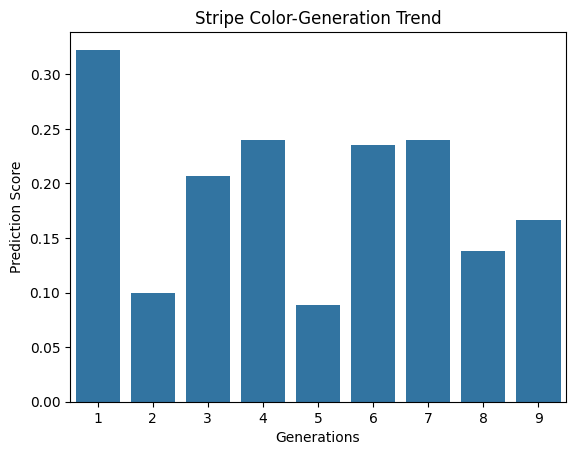

In [57]:
'''
The following code is partly generated using Chat GPT with the following command:
How do I set axis labels to an sns line plot
'''
plot = sns.barplot(x = gens, y = scores)
plot.set_xlabel('Generations')
plot.set_ylabel('Prediction Score')
plot.set_title('Stripe Color-Generation Trend')
plot;

SVM Classifiers

In [58]:
from sklearn.svm import SVC

def get_scores_svc(gen):
    gen_data = df[df['generation'] == gen]
    X = gen_data.get(['red', 'green', 'blue'])
    y = gen_data['encoded_type1']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    clf = SVC()
    clf.fit(X_train, y_train)
    
    return clf.score(X_test, y_test)
    
# Testing on the 1'st generation
get_scores_svc(1)

0.3548387096774194

In [59]:
scores_svc = []
gens = np.arange(1, len(df['generation'].unique()) + 1)
for gen in gens:
    score = get_scores_svc(gen)
    scores_svc.append(score)
scores = np.array(scores)

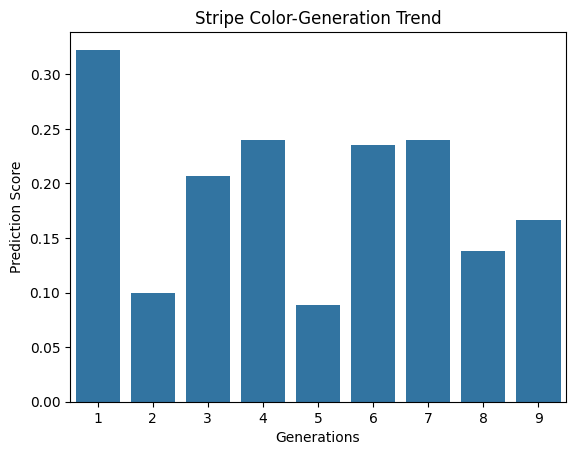

In [60]:
plot = sns.barplot(x = gens, y = scores)
plot.set_xlabel('Generations')
plot.set_ylabel('Prediction Score')
plot.set_title('Stripe Color-Generation Trend')
plot;

The scores appear similar for both the models, and are quite low. Judging from the plots, we can see that these the scores go down tramendously from the first gen to the subsequent ones. However, they are similar from the second generation onwards.

The scores were also low for both the models when we took the entire dataset. 

# Ethics & Privacy

The data for this shouldn’t have any biases per se. The only terms of use that could be important to consider are the copyright policies. However, since the use for content like this is personal, these issues should not be a limiting factor. Potential biases in the dataset could be the distributions of different generations of pokemons and how there could be more data available for the older generations. The solution to handle such biases would be making sure that we take equal volumes for each of the nine generations so that the data for one can’t dominate the others. Careful analysis of the data can help detect such patterns. The topic feels relatively nonchalant and shouldn’t have anything problematic about it. Data privacy concerns are unknown for now and need further research. 

# Discussion and Conclusion

In conclusion, the objective of this project was to identify a way to determine the type of a given Pokemon given its sprite colors. We were curious to see if there was in fact a correlation between a Pokemon’s type and its sprite colors, and if the sprite colors can consistently predict its type. To do this, we created a predictive model to determine the dominant colors and type of a given Pokemon given its name and image. We then drew conclusions about the data through a variety of visualizations.

We found that there is a strong correlation between a Pokemon’s first type and its basic colors, which is the closest pixel value of the type in general. This could be due to the fact that many Pokemon are colored based on characteristics of their type; for example, a grass-type Pokemon is usually green and a fire-type Pokemon is usually red, etc. While the model was able to accurately determine the first type of the Pokemon (accuracy = 1.0) given its basic color, the accuracy significantly decreased when the model was tested with the extracted colors, which is the most dominant color in the Pokemon’s sprite.

Some limitations of this model include that it does not predict the secondary type of Pokémon at all despite accurately predicting the primary type based on basic color analysis. In addition, the most dominant color of each Pokemon was extracted through a python library, so that image detector could have room for error.

This information could be useful to Pokemon trainers as a means for enhancing their gameplay experience by providing them with additional insights into the types of Pokemon they encounter. In turn, this could help them strategize better during battles and make more informed decisions about team composition. Additionally, this model could be helpful for players with visual impairments, as it could potentially make it easier for these players to identify Pokemon types. This could contribute to making games more accessible to a wider range of players. 


# Team Contributions

Manav:  background, data cleaning, EDA

Jake: research question/hypothesis, data cleaning, EDA

Anirvinna: ethics/privacy, EDA

Elvis: background, EDA

Hannah: background, conclusion/discussion
